<a href="https://colab.research.google.com/github/Eze-ar/Python-Analisis_credito_banco_aleman/blob/main/Credito_banco_aleman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Riesgo Crediticio para banco alemán

In [27]:
#importo las librerias para trabajar con Datos, ML y  gráficos
"""
Prompt de IA para resolverlo de forma automática:
importa los siguientes módulos con sus respectivos alias: pandas,
matplotlib, seaborn, drive de google colab, warnings
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#para manejar el filtrado de las advertencias
import warnings

# Importar data desde Google Drive
from google.colab import drive

drive.mount('/content/drive')

warnings.filterwarnings("ignore") #ignorar las adevertencias

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
pd.set_option('display.max_columns', None)  #sin límite en la visualización de campos/columnas
global df_banco, resultados

In [29]:
df_banco = pd.read_csv('/content/drive/MyDrive/PROGRAMACION/Python/Inmersión en Datos - Alura [2024]/german_credit.csv')
df_banco

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,none,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,none,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,none,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,none,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [30]:
df_banco.shape #forma del dataframe, cuántas filas(registros) y columnas(campos) tiene

(1000, 21)

In [31]:
df_banco.columns #lista el nombre de todos los campos

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [32]:
df_banco.info() #y para ver toda la info, estructura, tipos de datos, si hay nulos, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

La idea es posteriomente convertir las variables categóricas (str u objetos) a variables numéricas, que son las que entiende la máquina para poder realizar los procesos de ML

Ahora realizo el conteo por tipo de cuenta:

In [33]:
df_banco.account_check_status.value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [34]:
df_banco.account_check_status.value_counts().index #agrego index a lo anterior

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [35]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
columnas

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

Por cada campo, no numérico o de tipo object, llamados como dije variables categóricas, veo el detalle de su contenido (sin repeticiones):

In [36]:
for columna in columnas:
  print(f'Detalle del Campo "{columna}":')
  print(list(df_banco[columna].value_counts().index), '\n')


Detalle del Campo "account_check_status":
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year'] 

Detalle del Campo "credit_history":
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly'] 

Detalle del Campo "purpose":
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining'] 

Detalle del Campo "savings":
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM '] 

Detalle del Campo "present_emp_since":
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed'] 

Detalle del Campo "personal_status_sex":
['male : single', 'female : divorced/separated/m

Otra forma que se me ocurre, más sencillo, de hacer lo anterior es usar conjuntos, puesto que en ellos no hay repetición:

In [37]:
for columna in columnas:
  print(f"Detalle del campo {columna}:", '\n', set(df_banco[columna]), '\n')


Detalle del campo account_check_status: 
 {'>= 200 DM / salary assignments for at least 1 year', '< 0 DM', 'no checking account', '0 <= ... < 200 DM'} 

Detalle del campo credit_history: 
 {'no credits taken/ all credits paid back duly', 'existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'all credits at this bank paid back duly', 'delay in paying off in the past'} 

Detalle del campo purpose: 
 {'car (used)', 'domestic appliances', 'radio/television', 'retraining', 'education', 'repairs', 'car (new)', 'business', '(vacation - does not exist?)', 'furniture/equipment'} 

Detalle del campo savings: 
 {'... < 100 DM', '500 <= ... < 1000 DM ', 'unknown/ no savings account', '.. >= 1000 DM ', '100 <= ... < 500 DM'} 

Detalle del campo present_emp_since: 
 {'1 <= ... < 4 years', '.. >= 7 years', 'unemployed', '... < 1 year ', '4 <= ... < 7 years'} 

Detalle del campo personal_status_sex: 
 {'female : divorced/separated/married', 'male : 

Para empezar con la conversión de no-numérico a numérico uso un diccionario y el mapeo del mismo:

In [38]:
dic = {'yes': 1,
       'no':  0}

df_banco['foreign_worker'].map(dic) #por ahora no lo guardo en ninguna variable ya que es de ejemplo


0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

Del campo "foreign_worker" quiero saber los diferentes valores que tengo, que deben ser por la conversión 0 y 1 pero para también confirmar:

In [39]:
set(df_banco['foreign_worker'].map(dic))

{0, 1}

Con este criterio convierto ahora sí todos los campos categóricos a numéricos:

In [40]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = { 'no checking account': 4,
        '>= 200 DM / salary assignments for at least 1 year': 3,
        '0 <= ... < 200 DM': 2,
        '< 0 DM': 1
      }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
        'all credits at this bank paid back duly' : 2,
        'existing credits paid back duly till now' : 3,
        'delay in paying off in the past' : 4,
        'critical account/ other credits existing (not at this bank)' : 5
      }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = { 'car (new)' : 1,
        'car (used)' : 2,
        'furniture/equipment' : 3,
        'radio/television' : 4,
        'domestic appliances' : 5,
        'repairs' : 6,
        'education' : 7,
        '(vacation - does not exist?)' : 8,
        'retraining' : 9,
        'business' : 10,
        'others' : 11
      }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = { 'unknown/ no savings account' : 1,
        '.. >= 1000 DM ' : 2,
        '500 <= ... < 1000 DM ' : 3,
        '100 <= ... < 500 DM' : 4,
        '... < 100 DM' : 5
      }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = { '.. >= 7 years' : 1,
        '4 <= ... < 7 years' : 2,
        '1 <= ... < 4 years' : 3,
        '... < 1 year ' : 4,
        'unemployed' : 5
      }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = { 'male : divorced/separated' : 1,
        'female : divorced/separated/married' : 2,
        'male : single' : 3,
        'male : married/widowed' : 4,
        'female : single' : 5
      }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = { 'none' : 1,
        'co-applicant' : 2,
        'guarantor' : 3
      }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = { 'real estate' : 1,
        'if not A121 : building society savings agreement/ life insurance' : 2,
        'if not A121/A122 : car or other, not in attribute 6' : 3,
        'unknown / no property' : 4
      }
  df_banco['property'] = df_banco['property'].map(a)

  a = { 'bank' : 1,
        'stores' : 2,
        'none' : 3
      }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = { 'rent' : 1,
        'own' : 2,
        'for free' : 3
      }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = { 'unemployed/ unskilled - non-resident' : 1,
        'unskilled - resident' : 2,
        'skilled employee / official' : 3,
        'management/ self-employed/ highly qualified employee/ officer' : 4
      }
  df_banco['job'] = df_banco['job'].map(a)

  a = { 'yes, registered under the customers name ' : 1,
        'none' : 0
      }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = { 'yes': 1,
        'no' : 0
      }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

Y ya tengo todos campos numéricos, que es lo que me sirve para input de ML

In [41]:
procesar_datos()
df_banco.sample(3) #tomo una muestra aleatoria

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
238,0,4,12,5,5,1291,5,3,4,2,1,2,2,35,3,2,2,3,1,0,1
449,1,2,15,4,7,1512,2,3,3,4,1,3,2,61,2,2,2,3,1,0,1
929,0,1,12,4,1,1344,5,3,4,3,1,2,1,43,3,2,2,2,2,0,1


Hasta acá realicé una limpieza de los datos, pero aquí comienza mi análisis exploratorio, para ver si es posible llevar el conjunto de datos a un modelo de ML (Machine Learning)

In [42]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].tail()

,personal_status_sex,age,duration_in_month,credit_amount,default
995,2,31,12,1736,0
996,1,40,30,3857,0
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


El detalle es:


*   'male : divorced/separated' : 1,

*   'female : divorced/separated/married' : 2,
*   'male : single' : 3,
*   'male : married/widowed' : 4,
*   'female : single' : 5

Y se está mezclando el estado civil con el género, con lo que conviene separar
en 2 campos

Así que me interesaría crear un campo que sea masculino_femenino y sólo tenga 2 valores, 1 si es M ó 0 si es F:

In [43]:
dic_masculino_femenino = { 1: 1, 2: 0, 3: 1, 4: 1, 5: 0}   # siendo masculino_femenino = 1 si es hombre ó 0 si es femenino
df_banco['personal_status_sex'].map(dic_masculino_femenino)


0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    1
998    1
999    1
Name: personal_status_sex, Length: 1000, dtype: int64

Y la idea es proceder así con el resto de campos, en el proceso llamado *feature engineering*

In [44]:
def feature_engineering():
  global df_banco
  dic_masculino_femenino = { 1: 1, 2: 0, 3: 1, 4: 1, 5: 0}   # siendo masculino_femenino = 1 si es hombre ó 0 si es femenino
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['male_female'] = df_banco['personal_status_sex'].map(dic_masculino_femenino)
  df_banco['single'] = df_banco['personal_status_sex'].map(dic_est_civil) # 1 si es soltero ó 0 si es casado
  df_banco['age_range'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [ 30, 40, 50, 60, 70, 80]).astype(int)
  df_banco['credit_date_range']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['credit_value_range']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [45]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,male_female,single,age_range,credit_date_range,credit_value_range
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,1,1,70,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,0,0,30,4,6


In [46]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,male_female,single,age_range,credit_date_range,credit_value_range
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.690000,0.54800,40.270000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,11.364693,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,30.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,30.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.00000,40.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,50.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,80.000000,6.000000,19.000000


Deseo empe



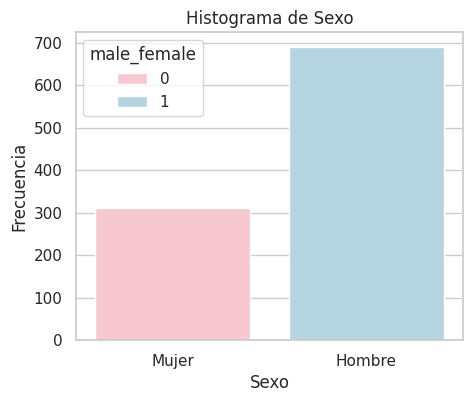

In [47]:
# Estilo de Seaborn (líneas horizontales de fondo)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores personalizados
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='male_female', hue='male_female', palette={0: 'pink', 1: 'lightblue'})
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Aclarar las etiquetas del eje X
plt.xticks(ticks=[0, 1], labels=['Mujer', 'Hombre']) #si no cambio las etiquetas aparecería sólo 0 y 1

# Mostrar el histograma
plt.show()



Análisis gráfico exploratorio:

In [48]:
def analisis_exploratorio():
    global df_banco
    histogramas = ['single', 'credit_date_range', 'age_range', 'default']
    lista_histogramas = list(enumerate(histogramas))

    # Colores personalizados para cada gráfico de barras
    colores = ['blue', 'green', 'orange', 'purple']

    plt.figure(figsize=(30, 20))
    plt.title('Histogramas')

    for i, histograma in lista_histogramas:
        plt.subplot(3, 2, i + 1)
        sns.countplot(x=histograma, data=df_banco, palette=[colores[i]])
        plt.xlabel(histograma, fontsize=20)
        plt.ylabel('Total', fontsize=20)

    plt.show()

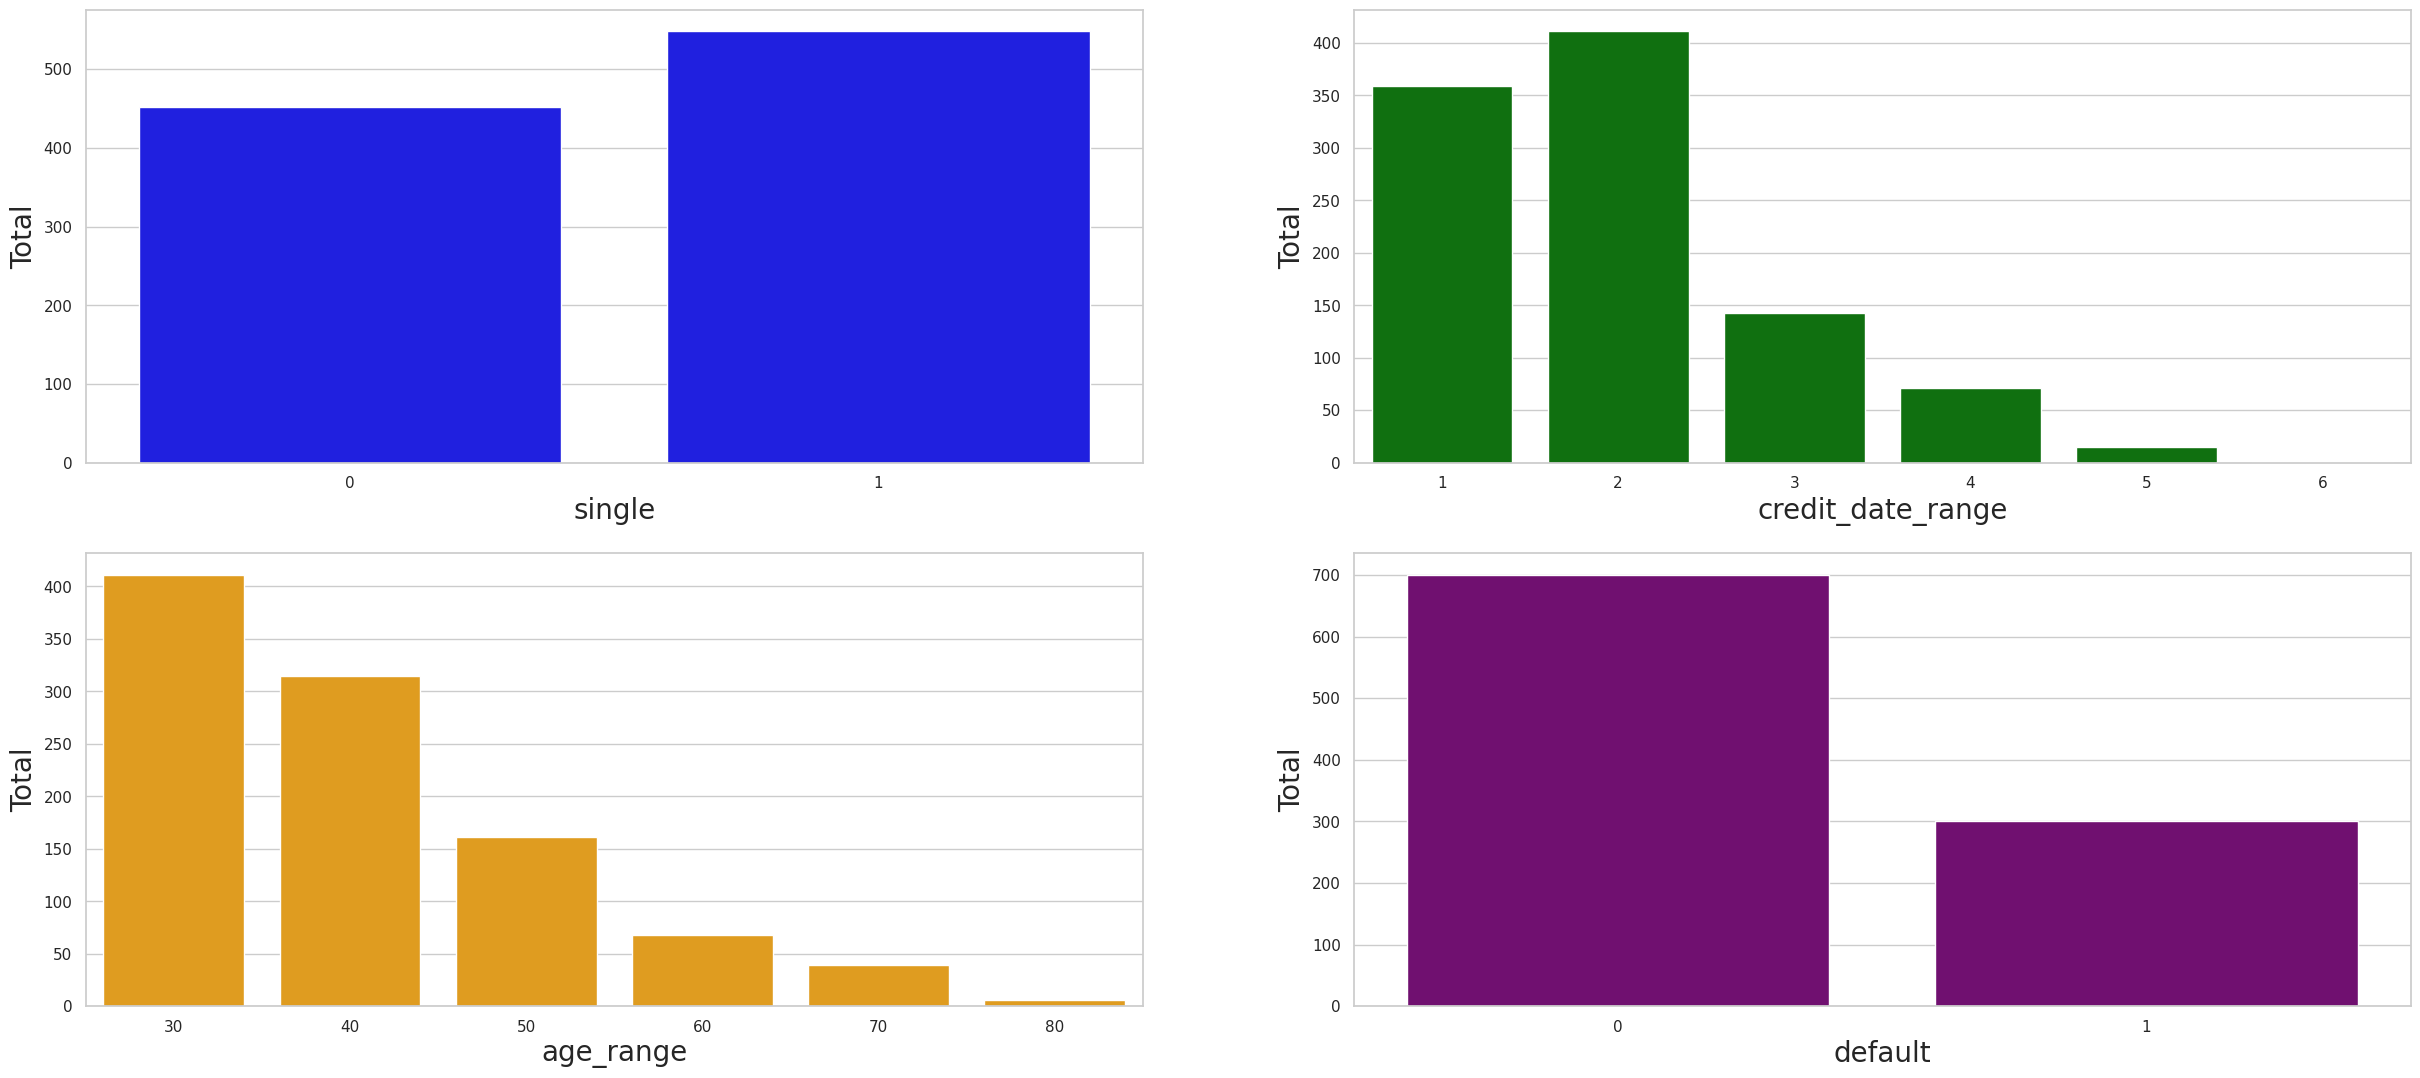

In [49]:
analisis_exploratorio()

De los gráficos se puede apreciar que hay muy pocos datos para personas de entre 70 y 80 años, y quizás incluso los de entre 60-70 según criterio del banco deban ser estudiados por separado, ya que se contará con poca data para entrenar los modelos de Machine Learning.

Y lo mismo con los plazos de crédito de entre 48-60 y 60-72 meses, hay pocos casos registrados, por lo que se puede prescindir del análisis.

Los mayores tomadores de crédito son personas de entre 18-30 años en primer lugar seguido de cerca por los de entre 30 y 40 años. Además se puede decir que la proporción de hombres esde más del doble que de mujeres.

El plazo de crédito predominante es entre 12 a 24 meses, seguido por el de entre 1 a 12 meses, para luego decaer marcadamente en el resto de plazos.

Otro punto importante a destacar que para la variable objetivo del estudio (default) tenemos mayor cantidad de buenos pagadores (default=0) que de malos (default=1) por lo que se presenta un desbalance y para tener un mejor modelo habría que recabar más datos sobre estos últimos.

Para dejar más claro las cantidades y porcentajes reitero lo anterior pero con estos datos puestos de manifiesto:

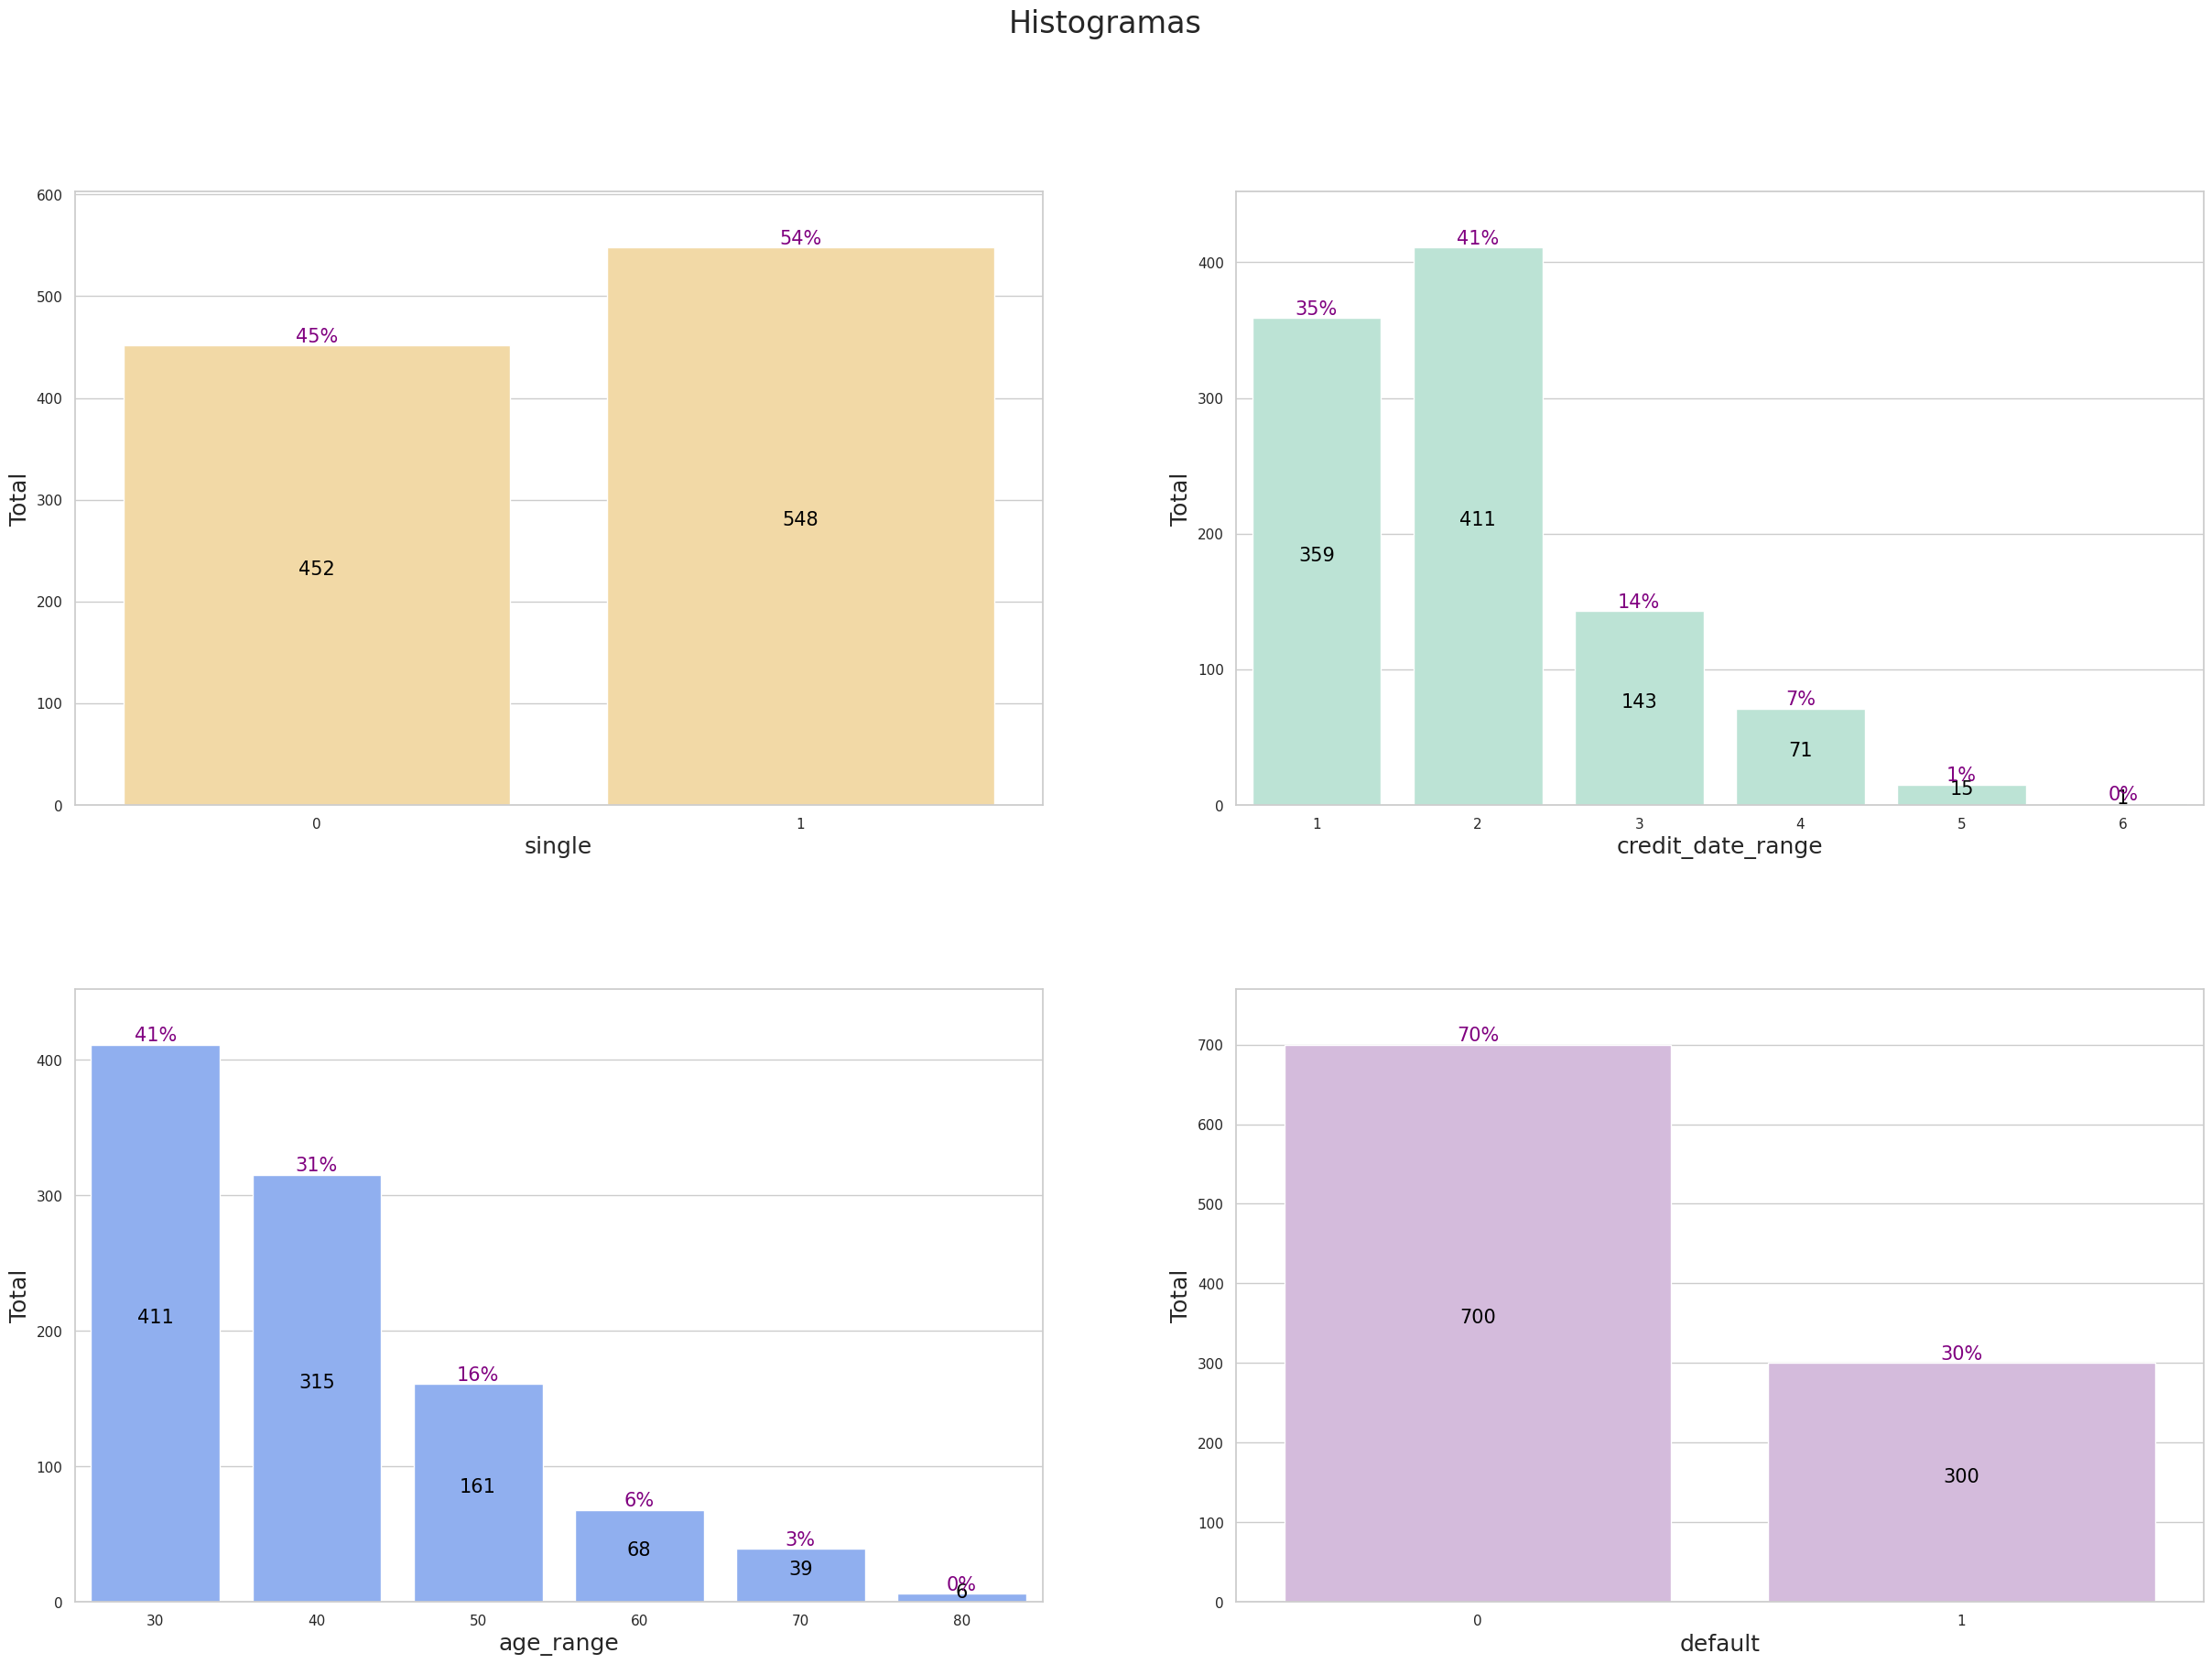

In [72]:
def analisis_exploratorio():
    global df_banco
    histogramas = ['single', 'credit_date_range', 'age_range', 'default']
    lista_histogramas = list(enumerate(histogramas))
    # Colores personalizados para cada gráfico de barras
    colores = ['#ffdd99', '#B5EAD7', '#80aaff', '#D7B5E1'] #['blue', 'green', 'orange', 'purple']
    plt.figure(figsize=(30, 20))
    plt.subplots_adjust(hspace=0.3)
    plt.suptitle('Histogramas', fontsize=24)
    for i in lista_histogramas:
        plt.subplot(2, 2, i[0]+1)
        ax = sns.countplot(x=i[1], data=df_banco, palette=[colores[i[0]]])
        plt.xlabel(i[1], fontsize=18)
        plt.ylabel('Total', fontsize=18)
        total_observaciones = len(df_banco)
        for p in ax.patches:
            x_pos = p.get_x() + p.get_width() / 2.
            y_pos_abs = p.get_height() / 2 + p.get_y()  # Para centrar absolutos :)
            y_pos_prop = p.get_height() / total_observaciones + p.get_y()  # Para centrar proporciones :)
            ax.annotate(f'{p.get_height():.0f}', (x_pos, y_pos_abs),
                        ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                        textcoords='offset points')
            porcentaje = p.get_height() / total_observaciones * 100
            ax.annotate(f'{int(porcentaje)}%', (x_pos, p.get_height()),
                        ha='center', va='bottom', fontsize=15, color='purple')

        ax.set_ylim(0, df_banco[i[1]].value_counts().max() * 1.1)

analisis_exploratorio()

Con estos datos de porcentajes se puede precisar:


*   El 69% de los solicitantes de crédito son varones frente a un 31% de mujeres
*   El 54% de los solicitantes están solteros y el 45% en pareja
*   El 41% de los solicitantes quieren un plan de pago de 12 a 23 meses. Un 35% quieren un plan de pago menor de un año.
*   El 41% de los solicitantes se encuentra en el rango etario de 18 a 29 años. Le sigue un 31% de personas entre 30 y 39 años. Un 16% de personas entre 40 y 49 años. Y un 11% de personas mayores de 50 años.
*   El 70% de los solicitantes son good customers frente a un 30% de bad customers.
*   El 28% de los creditos son solicitados para la compra de electrodomesticos, un 23% para adquirir un auto nuevo, un 18% para la compra de una radio/television y un 10% para la compra de un auto usado.


# Mapa de Calor de Correlaciones
Vamos a crear un mapa de calor de correlación, que es una representación gráfica que muestra la relación estadística entre dos conjuntos de datos. Cada par de variables se representa mediante un color que indica el grado y dirección de la correlación. Los colores varían desde tonos fríos (azules) para correlaciones negativas hasta tonos cálidos (rojos) para correlaciones positivas. De esta manera, un vistazo al mapa de calor permite identificar patrones y tendencias en la asociación entre las variables, facilitando la interpretación de la fuerza y la dirección de las relaciones estadísticas.

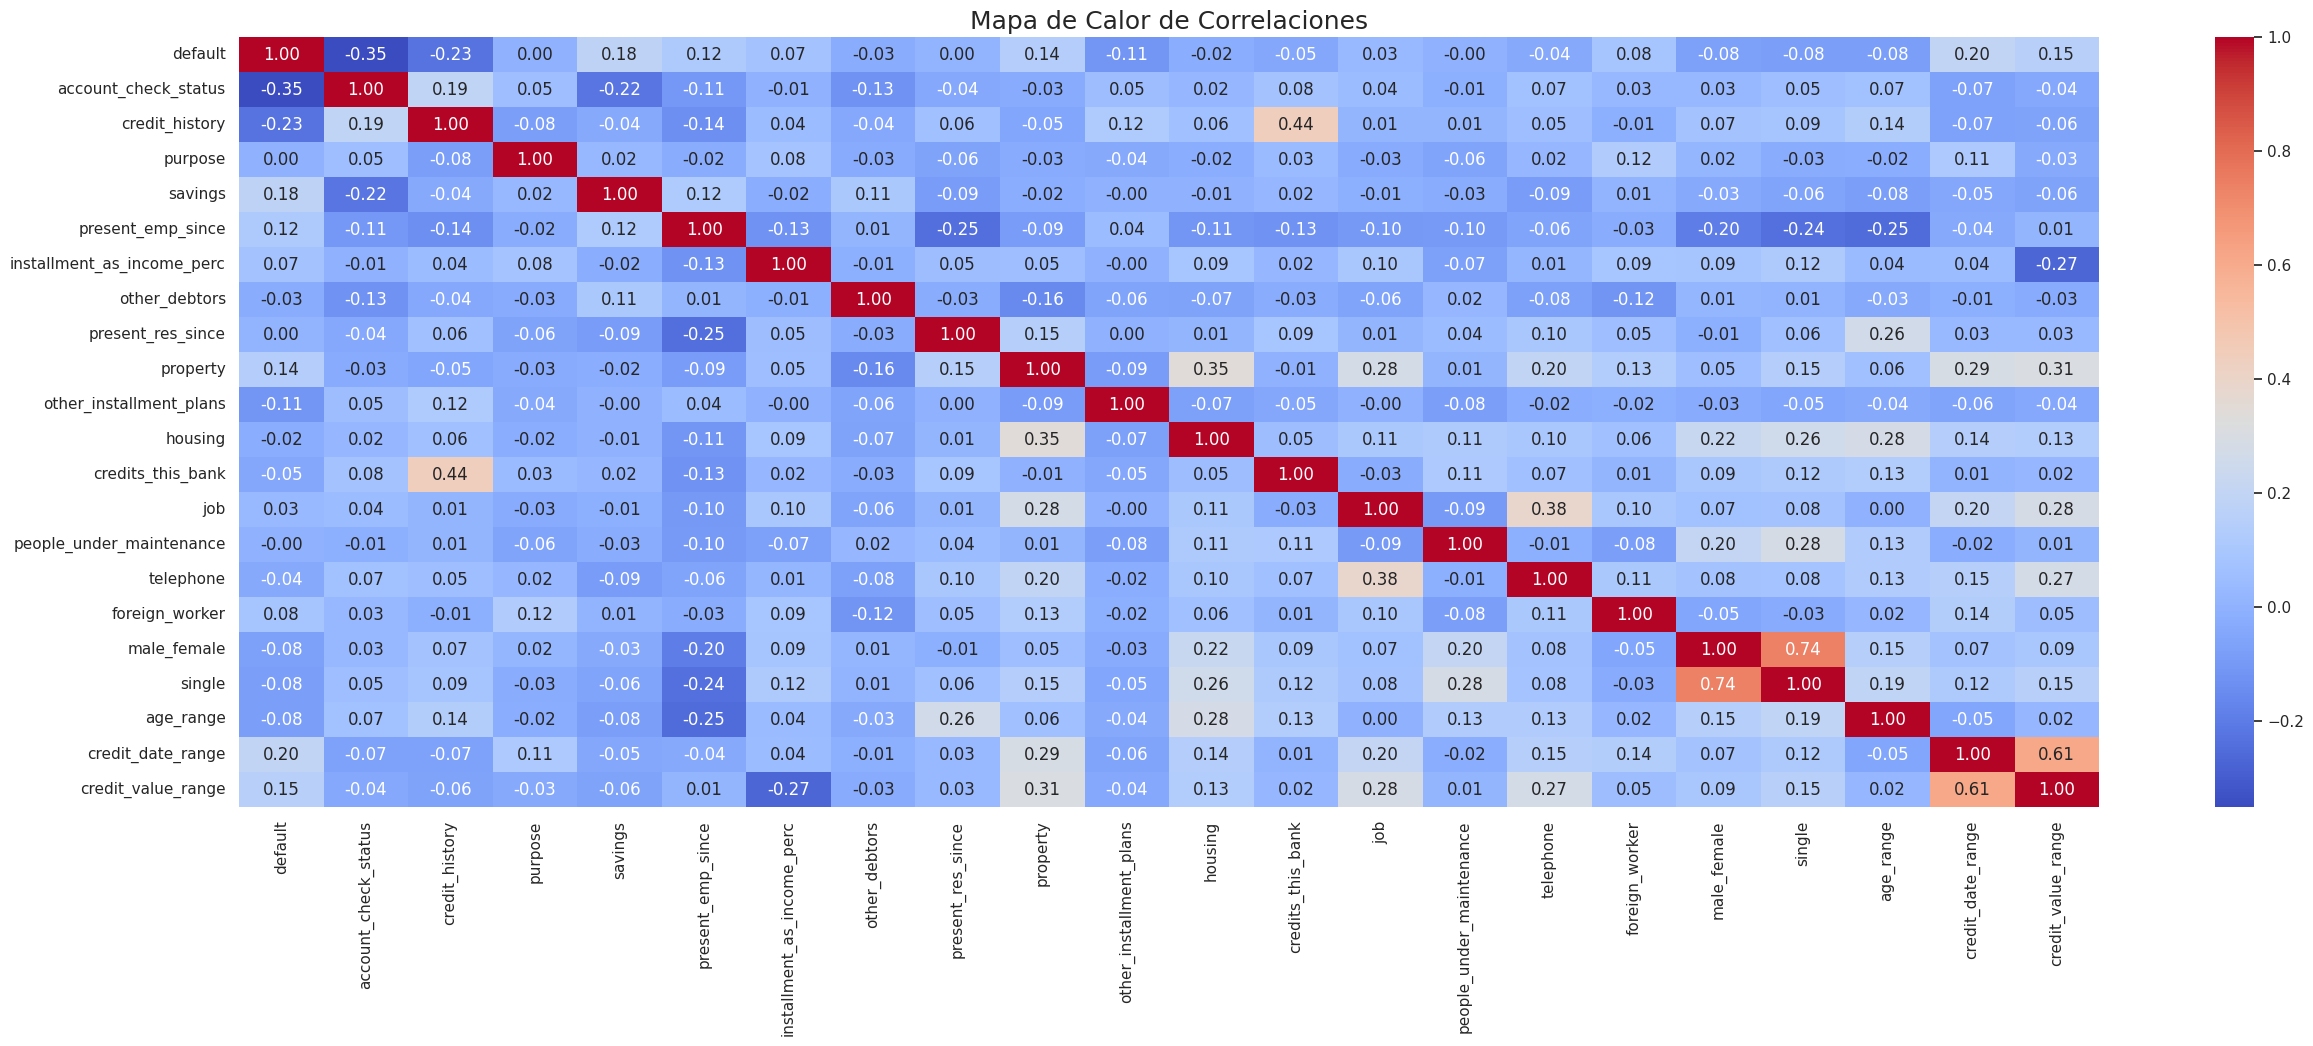

'\nLo que queremos identificar en definitiva es qué guarda relación con la variable\n\ndefault: (numerical)\n\t       Category of customer\n         0 : Good customer\n\t       1 : Bad customer\n'

In [50]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

'''
Lo que queremos identificar en definitiva es qué guarda relación con la variable

default: (numerical)
	       Category of customer
         0 : Good customer
	       1 : Bad customer
'''

# 4. Construcción de Modelos
Tenemos un problema de clasificación, es decir saber si mi cliente va a ser merecedor de un crédito (default=0) o no (default=1).

Así que veamos varios modelos de clasificación a ver cuál se ajusta mejor a nuestro caso

In [51]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [52]:
# prompt: ejemplo de modelo de machine learning de clasificacion

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Preprocesar los datos
# ... (your preprocessing code here)

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X = df_banco.drop('default', axis=1) #<---variables independientes, todas las variables excepto la objetivo
y = df_banco['default']  #<--- lo que intento pronosticar. Mi variable objetivo o dependiente
# X->y lo que significa que X explica y
#por convensión X es en mayúscula por ser un array de variables y 'y' es unidimensional

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#un 25% de la base de los datos lo dejamos para test (test_size=0.25)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train) #entreno el modelo con los datos de entrenamiento

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test) #con los datos de prueba testeo el modelo
accuracy = accuracy_score(y_test, predicciones) #comparo los pronósticos con los datos reales que poseo
print(f'Accuracy: {accuracy}')

# 5. Mejorar el modelo (opcional)
# ... (your model improvement code here)

Accuracy: 0.768


In [53]:
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
  #dejo un 30% para el test

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  # mis 5 criterios de evaluación:
  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [54]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print()

Regresión Logística
0.8033333333333333
0.7288135593220338
0.5
0.5931034482758621
0.8049337100630298

Árbol de Decisión
0.71
0.4936708860759494
0.45348837209302323
0.4727272727272727
0.6332862421212779

Random Forest
0.8033333333333333
0.7755102040816326
0.4418604651162791
0.562962962962963
0.8017278852423386

Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409



# 5. Evaluación y Selección del Modelo

In [55]:
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Model', inplace=True)

  # Transponer el DataFrame para facilitar la representación
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

  # Gráfico de barras agrupadas para cada métrica
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

  # @title Texto de título predeterminado
  from IPython.display import HTML, display

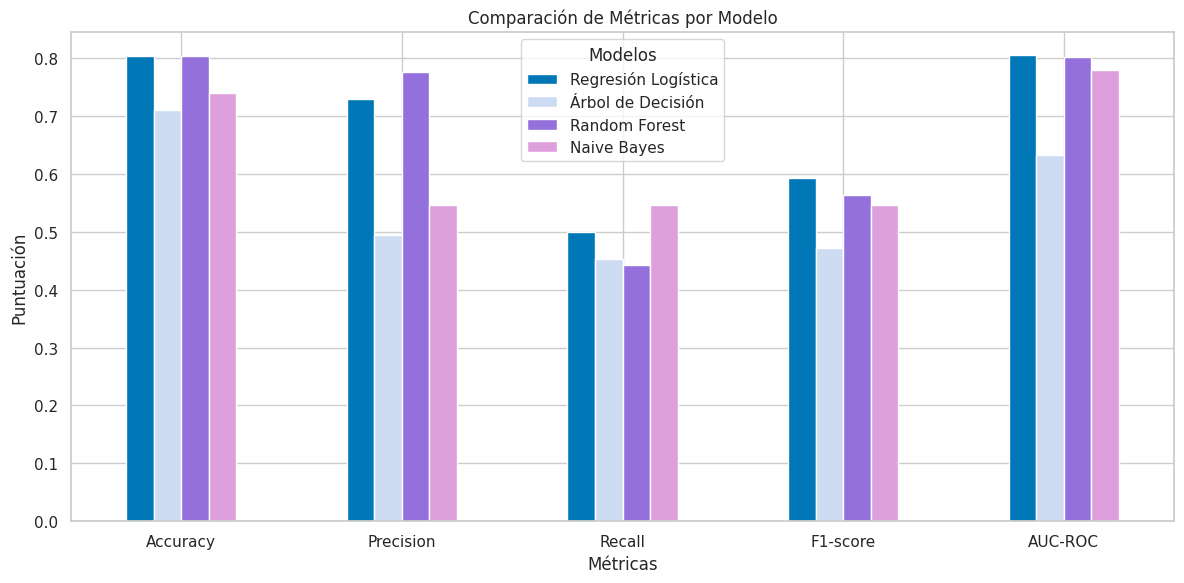

In [56]:
visualiza_resultados()

# Matriz de Confusión
Es una tabla utilizada en el analisis de clasificación para evalular el rendimiento de un modelo. Nos muestra la cantidad de predicciones correctas e incorrectas realizadas por nuestro modelo en comparación con los valores reales en el conjunto de datos de prueba. Es decir, permite ver el comportamiento del clasificar con base en los errores de tipo 1 y tipo 2.

Las celdas típicas en una matriz de confusión incluyen:

Verdaderos positivos (TP): Instancias positivas que fueron correctamente clasificadas como positivas.

Verdaderos negativos (TN): Instancias negativas que fueron correctamente clasificadas como negativas.

Falsos positivos (FP): Instancias negativas que fueron incorrectamente clasificadas como positivas.

Falsos negativos (FN): Instancias positivas que fueron incorrectamente clasificadas como negativas.

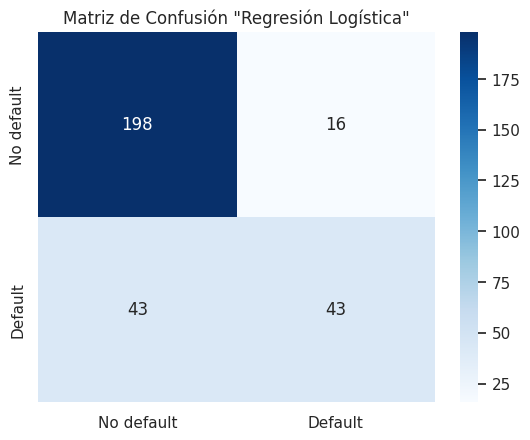

Model: Regresión Logística
Accuracy: 0.8033333333333333
Precision: 0.7288135593220338
Recall: 0.5
F1-Score: 0.5931034482758621
AUC-ROC: 0.8049337100630298



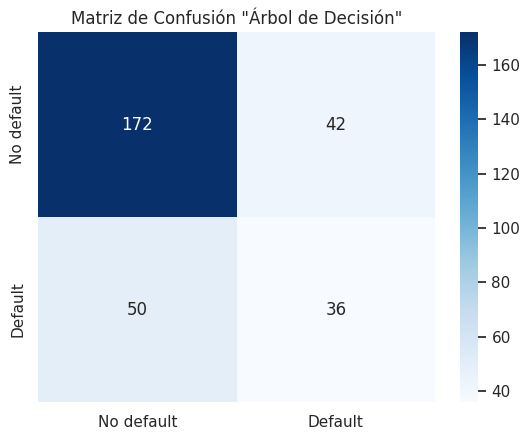

Model: Árbol de Decisión
Accuracy: 0.6933333333333334
Precision: 0.46153846153846156
Recall: 0.4186046511627907
F1-Score: 0.4390243902439025
AUC-ROC: 0.6111714844599001



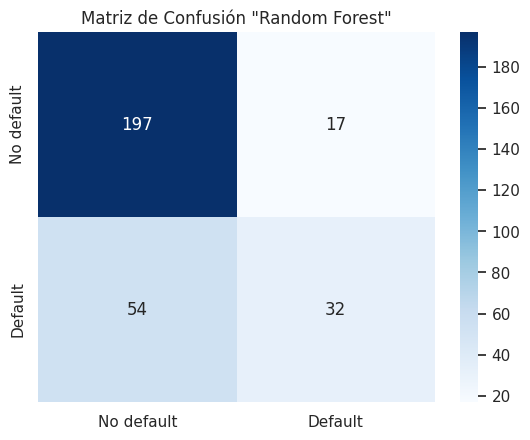

Model: Random Forest
Accuracy: 0.7633333333333333
Precision: 0.6530612244897959
Recall: 0.37209302325581395
F1-Score: 0.47407407407407404
AUC-ROC: 0.7817594001304063



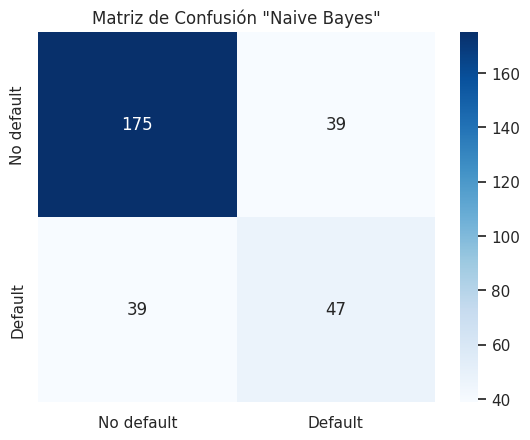

Model: Naive Bayes
Accuracy: 0.74
Precision: 0.5465116279069767
Recall: 0.5465116279069767
F1-Score: 0.5465116279069767
AUC-ROC: 0.7800478156922409



In [73]:
def crea_modelos():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)

        conf_matrix = metrics.confusion_matrix(test_y, predictions)
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No default', 'Default'], yticklabels=['No default', 'Default'])
        plt.title(f'Matriz de Confusión "{name}"')
        plt.show()

        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        print(f'Model: {name}')
        print(f'Accuracy: {accuracy}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'AUC-ROC: {roc_auc}\n')

crea_modelos()

Accuracy: Predicciones correctas dividido el número total de predicciones.

Precisión: Verdaderos positivos dividido el total de instancias clasificas como positivas. Hay que prestarle atención cuando queremos minimizar los falsos positivos (Error de tipo 1)

Recall: Es la fracción de instancias positivas que el modelo predijo de forma correcta. Es la cantidad de verdaderos positivos dividido el total de instancias verdaderamente positivas. Es importante cuando queremos minimizar los falsos negativos (Error de tipo 2)

F1-Score: Combinación de la precisión y el recall en un solo valor.

AUC-ROC: Es el área bajo la curva ROC. La curva ROC representa graficamente la tasa de verdaderos positivos frente a la tasa de falsos positivos. Proporciona una medida de la capacidad de discriminación del modelo. Los valores cercanos a 1 indican un buen rendimiento del modelo.

Tras realizar varias pruebas, el modelo que muestra mejores resultados al analizar las matrices de confusión es el modelo Random Forest. Teniendo la menor cantidad de falsos positivos, es decir, nos permite evitar el error de tipo 1. A su vez, es el modelo que ha detectado mayor cantidad de verdaderos positivos.